In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# np.set_printoptions(precision=3, suppress=True)
import datetime
import seaborn as sns


In [110]:
df = pd.read_csv('pizza.csv')
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,35497,15674,cali_ckn_l,4,9/19/2015,14:16:35,20.75,83.00,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
1,184,78,spicy_ital_l,3,1/2/2015,12:28:14,20.75,62.25,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
2,18318,8040,thai_ckn_l,3,5/15/2015,14:13:27,20.75,62.25,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
3,37639,16619,prsc_argla_l,3,10/8/2015,12:19:53,20.75,62.25,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
4,38820,17112,bbq_ckn_l,3,10/17/2015,12:56:31,20.75,62.25,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48369,21242,pepperoni_s,1,12/29/2015,19:54:11,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
48616,48375,21244,pepperoni_s,1,12/29/2015,22:10:05,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
48617,48483,21293,pepperoni_s,1,12/31/2015,14:40:24,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
48618,48520,21304,pepperoni_s,1,12/31/2015,16:30:41,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza


In [111]:
## giá trung bình mà người mua chi tiền để mua bánh 
df['unit_price'].mean()
print('Giá trung bình mỗi chiếc bánh bán ra:',round(df['unit_price'].mean()))
## bánh trung bình một ngày
df['quantity'].sum()
print('Trung bình số bánh bán một ngày:',round(df['quantity'].sum()/365))
## trung bình bánh một tháng
print('Trung bình số lượng bánh bán một tháng:',round(df['quantity'].sum()/12))
##tổng bánh bán trong 1 năm
print ('Tổng số bánh bán trong 1 năm:',df['quantity'].sum())

print ('Tổng Doanh thu trong năm:',df['total_price'].sum())

Giá trung bình mỗi chiếc bánh bán ra: 16
Trung bình số bánh bán một ngày: 136
Trung bình số lượng bánh bán một tháng: 4131
Tổng số bánh bán trong 1 năm: 49574
Tổng Doanh thu trong năm: 817860.05


In [112]:
## mỗi  năm sản phảm được oder bao nhiêu lần ############################################################################
idpizza = df['pizza_id']
vals, count = np.unique(idpizza, return_counts=True)
# print(vals)
# print(count)
# print(vals.size)
#
print('1. Trung bình mỗi loại được được bán mỗi năm: ',np.mean(count))
print('2. Trung vị : ',np.median(count))
print('3. Số lượng  loại bán tốt nhát: ',np.max(count))
print('4. Số lượng loại bánh bán ít nhất: ',np.min(count))
print('5. Tên của loại được bán nhiều nhất: ',vals[np.argmax(count)])
print('6. Tên của loại được bán ít nhất: ',vals[np.argmin(count)])


1. Trung bình mỗi loại được được bán mỗi năm:  534.2857142857143
2. Trung vị :  457.0
3. Số lượng  loại bán tốt nhát:  1811
4. Số lượng loại bánh bán ít nhất:  28
5. Tên của loại được bán nhiều nhất:  big_meat_s
6. Tên của loại được bán ít nhất:  the_greek_xxl


In [113]:
## mỗi đơn hàng thường đặt bao nhiêu bánh pizza ###############################################################
orders = df['order_id']
vals, count = np.unique(orders, return_counts=True)
# print(vals)
# print(count)
# print(vals.size)
print('Số lượng bánh trung bình mỗi đơn hàng mua:',np.mean(count))# trung bình 
print('Trung vị của mỗi đơn hàng: ',np.median(count))# trung vị 

Số lượng bánh trung bình mỗi đơn hàng mua: 2.2772833723653396
Trung vị của mỗi đơn hàng:  2.0


In [114]:
## size bánh bán chạy nhất 
a, b = [],[]
for i in df['pizza_size'].unique():
    print(i, len(df[df['pizza_size'] == i]))
    


L 18526
XL 544
M 15385
S 14137
XXL 28


In [115]:
##ngày bán chạy nhất 
lst = []
lst2 = []
for i in df['order_date'].unique():
    sum = 0
    for j in df['quantity'][df['order_date'] == i]:
        sum += j
    lst.append(str(i) + " " + str(sum))
    lst2.append(sum)
maax = max(lst2)
maax
for i in lst:
    if '266' in i:
        print(i)

11/26/2015 266


In [116]:
## tách tháng ra , tháng  tên cột là M trong df ##########################################
df['order_date']= pd.to_datetime(df['order_date'])
df['M'] = df['order_date'].dt.month
df[['order_date','M']].head()

,order_date,M
0,2015-09-19,9
1,2015-01-02,1
2,2015-05-15,5
3,2015-10-08,10
4,2015-10-17,10


In [117]:
##tính tổng thu doanh thu mỗi tháng 
tt = df.groupby('M').sum()['total_price']
temp = np.lexsort((tt.index, tt.values))
print(tt)
## 5 thang ban cao nhat 
for i in temp[-5:]:
    print(i+1, tt[i+1])
##temp[-1]
# tt[temp[-1]+1]


M
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: total_price, dtype: float64
1 69793.3
11 70395.35
3 70397.1
5 71402.75
7 72557.9


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11408\4223812672.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



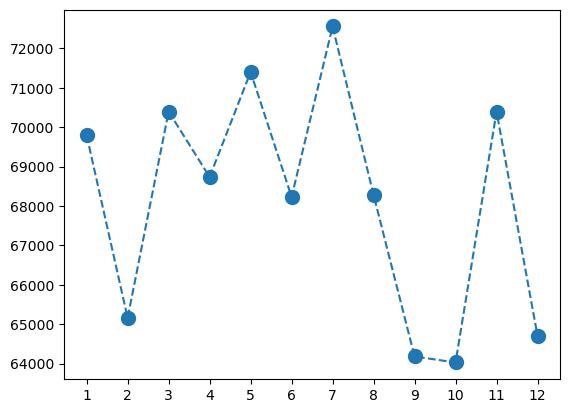

In [118]:
##biểu đồ doanh thu 12 tháng 
thang = range(1,13)
plt.plot(thang,tt,linestyle ='--',marker='.',markersize=20)
plt.xticks(thang)
plt.yticks(np.arange(64000,73000,1000))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11408\2397908333.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



The Sicilian Pizza 30940.5
The Four Cheese Pizza 32265.7
The Hawaiian Pizza 32273.25
The Italian Supreme Pizza 33476.75
The Southwest Chicken Pizza 34705.75
The Spicy Italian Pizza 34831.25
The Classic Deluxe Pizza 38180.5
The California Chicken Pizza 41409.5
The Barbecue Chicken Pizza 42768.0
The Thai Chicken Pizza 43434.25


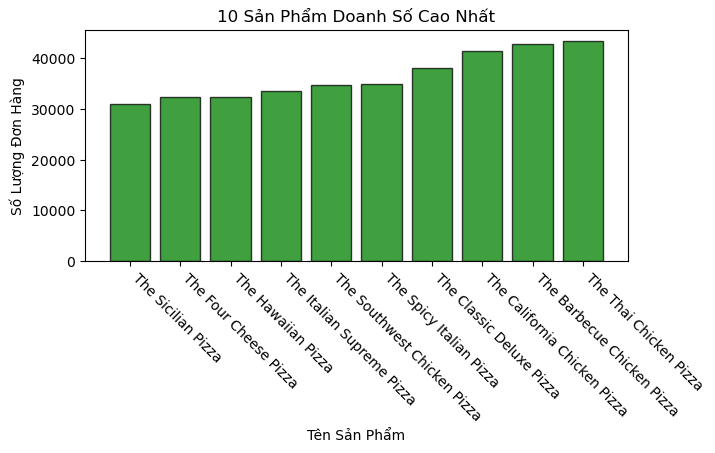

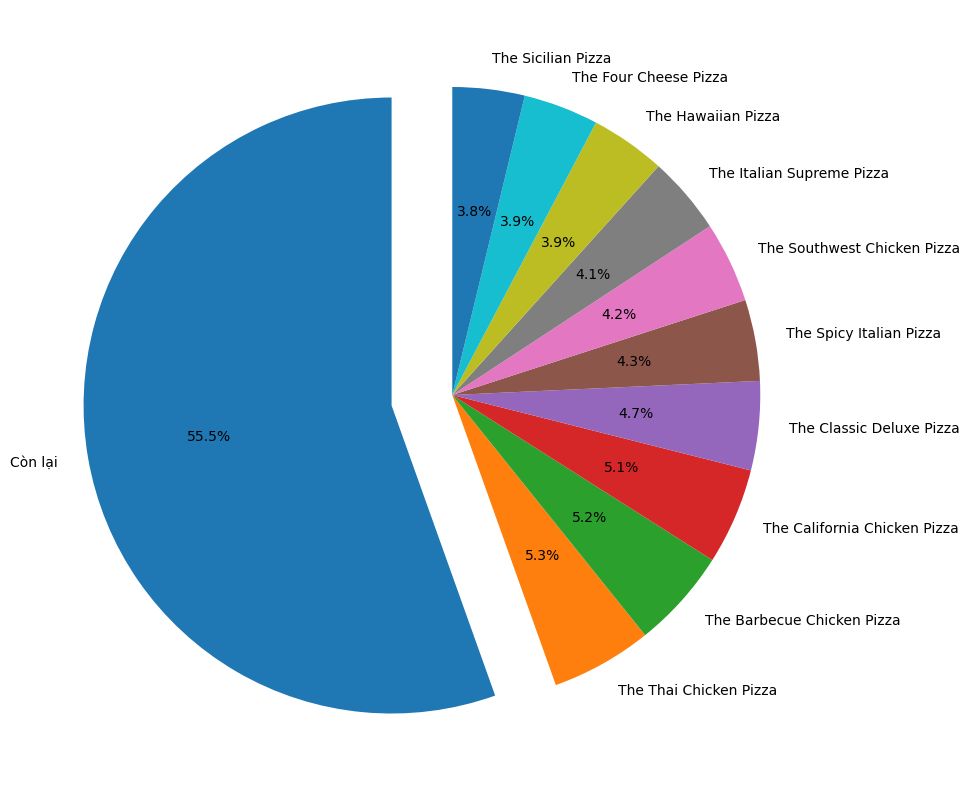

In [119]:
## tổng danh thu từng loại bánh trong năm 
a,b =[],[]
yy = df.groupby('pizza_name').sum()['total_price']
## 5 loại bánh có doanh thu cao nhất 
temp1 = np.lexsort((yy.index, yy.values)) 
for i in temp1[-10:]:
    print(yy.index[i], yy[i])
    a.append(yy.index[i])
    b.append(yy[i])
## biểu đồ 
plt.figure(figsize = (7,3))
plt.bar(x=a, height=b, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Doanh Số Cao Nhất')
plt.xlabel('Tên Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(rotation=-45, ha='left')
plt.show()
## biểu đồ so với tổng thể
total = df['total_price'].sum()
a.append('Còn lại')
b.append(total - np.sum(b))
data = np.array(b)/df['total_price'].sum()*100
data
explode =(0.2,0,0,0,0,0,0,0,0,0,0)
ax = plt.subplots(figsize = (20,10))
ax =plt.pie(data[::-1], labels = a[::-1], startangle = 90,autopct='%1.1f%%',explode=explode)
# plt.legend(a[::-1])
plt.show()

The Brie Carre Pizza 11588.5
The Green Garden Pizza 13955.75
The Spinach Supreme Pizza 15277.75
The Mediterranean Pizza 15360.5
The Spinach Pesto Pizza 15596.0
The Calabrese Pizza 15934.25
The Italian Vegetables Pizza 16019.25
The Soppressata Pizza 16425.75
The Chicken Pesto Pizza 16701.75
The Chicken Alfredo Pizza 16900.25


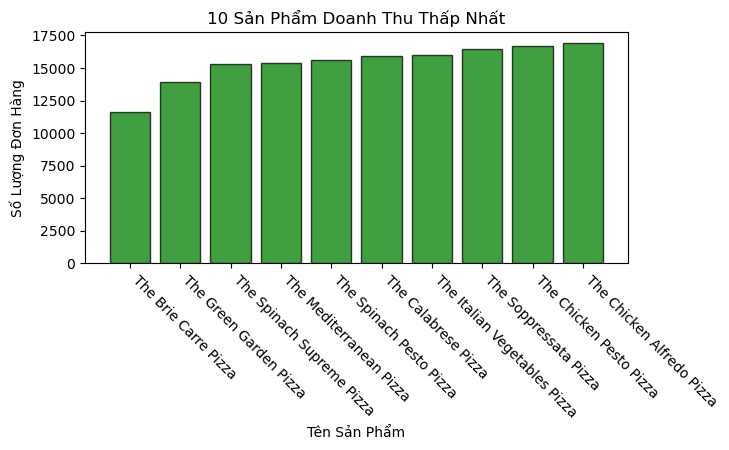

In [120]:
## 5 loai có  doanh thu tệ nhất  
a,b =[],[]
temp1 = np.lexsort((yy.index, yy.values))
for i in temp1[0:10:1]:
    print(yy.index[i], yy[i])
    a.append(yy.index[i])
    b.append(yy[i])
## bieu do 
plt.figure(figsize = (7,3))
plt.bar(x=a, height=b, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Doanh Thu Thấp Nhất')
plt.xlabel('Tên Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(rotation=-45, ha='left')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11408\3278787138.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



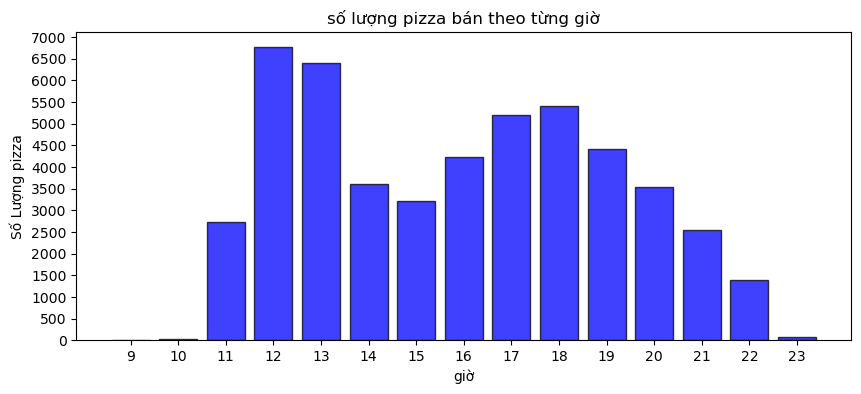

In [121]:
# #trung binh bán hàng theo giờ
# ax.hist(order_hour_of_day, bins=24)
df['order_time']= pd.to_datetime(df['order_time'])
df['gio'] = df['order_time'].dt.hour
#số đơn hàng trong các giờ 
uu = df.groupby('gio').sum()['quantity']
#biểu đồ các đơn hàng số lượng bánh bán trong các giờ 
hour = range (9,24)
plt.figure(figsize = (10,4))
plt.bar(x=hour, height=uu, 
        color='blue', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('số lượng pizza bán theo từng giờ')
plt.xticks(hour)
plt.yticks(np.arange(0,7500,500))
plt.xlabel('giờ')
plt.ylabel('Số Lượng pizza')
plt.show()


In [122]:
## loại pizza bán chạy nhất của từng tháng 
pz, sl, tmp1, tmp2 = [], [], [], []
for i in range(1, 13):
    for j in df['pizza_name'].unique():
        tmp1.append(j)
        tmp2.append(round(np.sum(df['quantity'][(df['pizza_name'] == j) & (df['M'] == i)]),2))
    idx = np.lexsort([tmp1, tmp2])[::-1][0:1]
    pz.append(np.array(tmp1)[idx])
    sl.append(np.array(tmp2)[idx])
    tmp1, tmp2 = [], []
print('Các loại bánh bán chạy nhất của từng tháng:')
for i in range(0,12):        
        print('Tháng',i+1 , pz[i], sl[i])
        
        


Các loại bánh bán chạy nhất của từng tháng:
Tháng 1 ['The Pepperoni Pizza'] [239]
Tháng 2 ['The Pepperoni Pizza'] [205]
Tháng 3 ['The Barbecue Chicken Pizza'] [231]
Tháng 4 ['The Hawaiian Pizza'] [219]
Tháng 5 ['The Pepperoni Pizza'] [241]
Tháng 6 ['The California Chicken Pizza'] [222]
Tháng 7 ['The Classic Deluxe Pizza'] [227]
Tháng 8 ['The California Chicken Pizza'] [231]
Tháng 9 ['The Classic Deluxe Pizza'] [209]
Tháng 10 ['The Pepperoni Pizza'] [199]
Tháng 11 ['The Hawaiian Pizza'] [227]
Tháng 12 ['The Hawaiian Pizza'] [209]


In [123]:
## loại pizza bán chậm nhất của từng tháng 
pz, sl, tmp1, tmp2 = [], [], [], []
for i in range(1, 13):
    for j in df['pizza_name'].unique():
        tmp1.append(j)
        tmp2.append(round(np.sum(df['quantity'][(df['pizza_name'] == j) & (df['M'] == i)]),2))
    idx = np.lexsort([tmp1, tmp2])[::][0:1]
    pz.append(np.array(tmp1)[idx])
    sl.append(np.array(tmp2)[idx])
    tmp1, tmp2 = [], []
print('Các loại bánh bán tệ nhất của từng tháng: ')
for i in range(0,12):
    print('Tháng',i + 1, pz[i], sl[i])

Các loại bánh bán tệ nhất của từng tháng: 
Tháng 1 ['The Brie Carre Pizza'] [35]
Tháng 2 ['The Brie Carre Pizza'] [44]
Tháng 3 ['The Brie Carre Pizza'] [46]
Tháng 4 ['The Brie Carre Pizza'] [32]
Tháng 5 ['The Brie Carre Pizza'] [46]
Tháng 6 ['The Brie Carre Pizza'] [40]
Tháng 7 ['The Brie Carre Pizza'] [44]
Tháng 8 ['The Brie Carre Pizza'] [43]
Tháng 9 ['The Brie Carre Pizza'] [49]
Tháng 10 ['The Brie Carre Pizza'] [34]
Tháng 11 ['The Brie Carre Pizza'] [42]
Tháng 12 ['The Brie Carre Pizza'] [35]


Chicken 11050
Veggie 11649
Supreme 11987
Classic 14888


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11408\1927025158.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



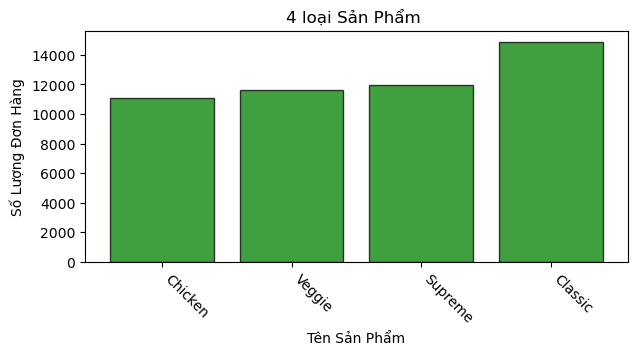

In [124]:
## tổng số lượng từng pizza_category bán trong năm 
pp = df.groupby('pizza_category').sum()['quantity']

a,b =[],[]
temp1 = np.lexsort((pp.index, pp.values))
for i in temp1[0:4:1]:
    print(pp.index[i], pp[i])
    a.append(pp.index[i])
    b.append(pp[i])
## biểu đồ 
plt.figure(figsize = (7,3))
plt.bar(x=a, height=b, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('4 loại Sản Phẩm ')
plt.xlabel('Tên Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(rotation=-45, ha='left')
plt.show()

['Chicken' 'Supreme' 'Classic' 'Veggie']
[913, 875, 994, 924, 939, 910, 963, 934, 900, 832, 981, 885]
[1044, 964, 991, 1013, 1045, 1040, 1041, 991, 877, 998, 1050, 933]
[1257, 1178, 1236, 1253, 1324, 1199, 1331, 1283, 1202, 1181, 1262, 1182]
[1018, 944, 1040, 961, 1020, 958, 1057, 960, 911, 872, 973, 935]


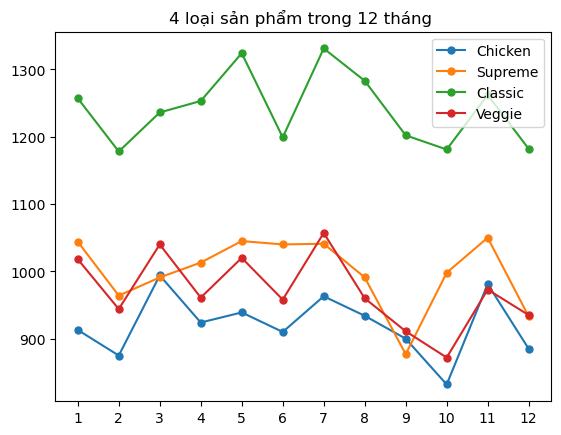

In [125]:
## 4 loại banh bán theo 12 tháng
t=range(1,13)
tmp, tmp2 = [], []
for i in df['pizza_category'].unique():
    for j in range(1, 13):
        tmp.append(np.sum(df['quantity'][(df['pizza_category'] == i) & (df['M'] == j)]))
    tmp2.append(tmp)
    tmp = []
print(df['pizza_category'].unique())
for i in tmp2:
    print(i)
## biểu đồ 
for i in range (0,4):
    plt.plot(t,tmp2[i],marker='.',markersize=10)
plt.legend(df['pizza_category'].unique()) 
plt.title('4 loại sản phẩm trong 12 tháng ')
plt.xticks(range(1, 13))
plt.show()



In [126]:
x = df[['quantity', 'unit_price']]
y = df['total_price']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
huy = LinearRegression()

In [131]:
huy.fit(X_train,y_train)

LinearRegression()

In [132]:
predictions = huy.predict(X_test)
print(predictions)

[11.91860275 16.5051079  15.23107869 ... 15.99549622 16.25030206
 11.91860275]


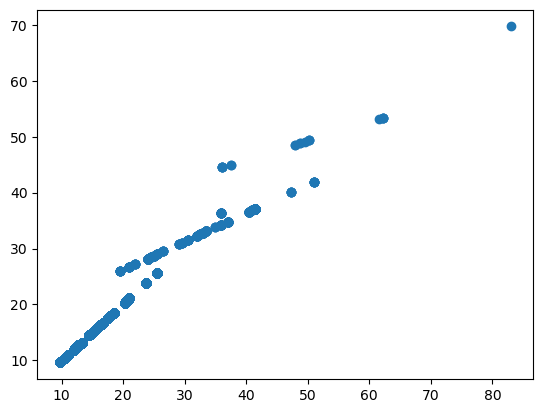

In [133]:
plt.scatter(y_test,predictions)

In [134]:
!pip install cufflinks


In [135]:
# sns.distplot(y_test - predictions)

In [136]:
huy.score(X_test, y_test)

0.9862871404061023